In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm
from six import StringIO
import pydotplus


from sklearn import tree, metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
column_names= ['age', 'workclass', 'fnwlgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex',
               'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
data = pd.read_csv("/content/drive/MyDrive/Learning/Python_for_Data_Science_and_Machine_Learning/Datas/Adult_Data/adult_data.csv",
                   header= None, names= column_names)
data.head()

,age,workclass,fnwlgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnwlgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.describe()

,age,fnwlgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data = data.drop('fnwlgt', axis=1) ##dropped fnwlgt column as it was useless
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
x= data.iloc[:, :-1]
y= data['income']
x= pd.get_dummies(x) ## Grouping Categorical Data for Skleran Decision Tree
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 10)

In [ ]:
## Hyper Parameter Tunining ussing grid search
hp= {'criterion': ['gini', 'entropy'],
     'max_depth': list(range(3,9))}
clf = tree.DecisionTreeClassifier()
for cv in tqdm(range(3,6)):
  grid= GridSearchCV(clf, param_grid=hp, cv=cv)
  grid.fit(x_train, y_train)
  print(f"score for {cv} fold CV is : {grid.score(x_test,y_test)}")
  print(f"Best result {grid.best_params_}")

  0%|          | 0/3 [00:00<?, ?it/s]

score for 3 fold CV is : 0.8502994011976048
Best result {'criterion': 'gini', 'max_depth': 7}
score for 4 fold CV is : 0.8502994011976048
Best result {'criterion': 'gini', 'max_depth': 7}
score for 5 fold CV is : 0.85014586212191
Best result {'criterion': 'gini', 'max_depth': 7}


In [ ]:
clf = tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 7, ccp_alpha= 0.00011395552111453266)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8504529402732995

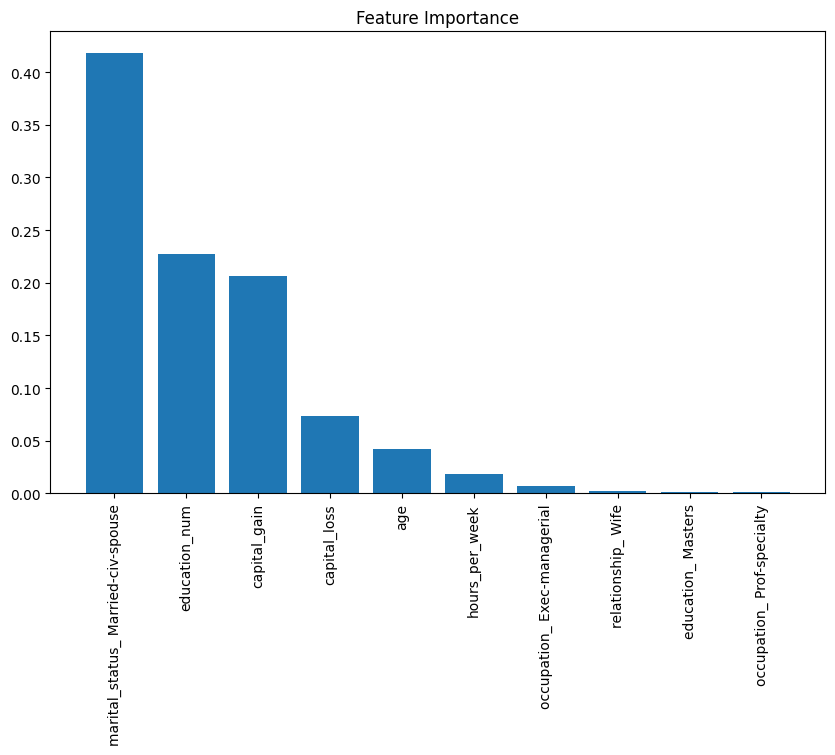

In [ ]:
# prompt: plot the feature importance of only the 10 features with highest importance and mention the name of feature instead of their index

import matplotlib.pyplot as plt
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [x_train.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(10), importances[indices[:10]], align="center")

# Add feature names as x-axis labels
plt.xticks(range(10), names[:10], rotation=90)

# Show plot
plt.show()

In [ ]:
# prompt: Train and test the model on only the 5 most important features found earlier

# Get the indices of the top 5 most important features
top_5_indices = indices[:5]

# Get the names of the top 5 most important features
top_5_features = [x_train.columns[i] for i in top_5_indices]

# Create new training and testing sets with only the top 5 features
x_train_top5 = x_train[top_5_features]
x_test_top5 = x_test[top_5_features]

# Train the decision tree classifier on the top 5 features
clf_top5 = tree.DecisionTreeClassifier(criterion='gini', max_depth=7, ccp_alpha=0.00011395552111453266)
clf_top5.fit(x_train_top5, y_train)

# Evaluate the model on the testing set
accuracy_top5 = clf_top5.score(x_test_top5, y_test)
print(f"Accuracy with top 5 features: {accuracy_top5}")

# Generate predictions
y_pred_top5 = clf_top5.predict(x_test_top5)

# Print the classification report
print(classification_report(y_test, y_pred_top5))

Accuracy with top 5 features: 0.849531705819131
              precision    recall  f1-score   support

       <=50K       0.86      0.96      0.91      4929
        >50K       0.79      0.52      0.63      1584

    accuracy                           0.85      6513
   macro avg       0.82      0.74      0.77      6513
weighted avg       0.84      0.85      0.84      6513



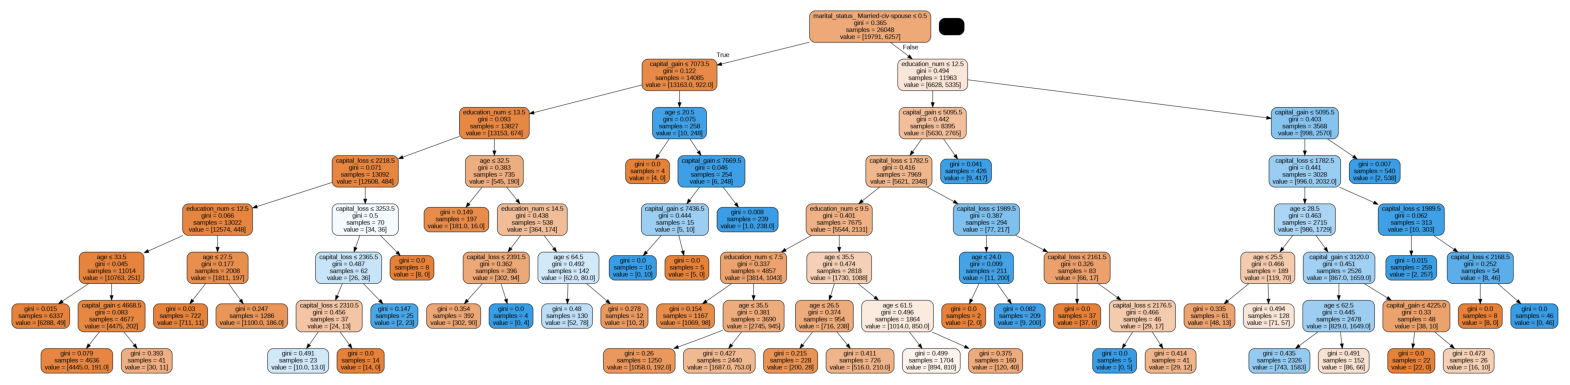

In [ ]:
# prompt: visualize the top5 tree

dot_data = StringIO()
export_graphviz(clf_top5, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = x_train_top5.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('top5_tree.png')
plt.figure(figsize=(20,10))
img = plt.imread('top5_tree.png')
plt.imshow(img)
plt.axis('off')
plt.show()